<a href="https://colab.research.google.com/github/PerttiP/ML-Project-in-Automated-Software-Engineering/blob/main/PerttiPrepareData24features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PerttiPrepareData24features
Google Colab version
--------------------
Pre-processing step:
This file must be run first to prepare a dataframe with 24 features,
that can be loaded by 3 different ANN models. The dataframe is saved
as a csv file called PrepDataframe24features.csv
--------------------
Updates:
UPD1. With extended data feature "absolute code churn measure" : code_churn = la + ld (See cell 'Extend data with additional column/feature').
UPD2. With feature selection (Remove redundant data) based on comparing feature pairs with correlation above 0.88.
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # visualization
import matplotlib.pyplot as plot

In [ ]:
# Utility functions
def print_full(x):
    # Display the full dataframe in <x>
    pd.set_option('display.max_rows', len(x))
    print('--------------------------')
    print(x)
    pd.reset_option('display.max_rows')

def print_sample(x, num_rows = 20):
    # Display a random sample in <x> of <num_rows> rows
    sample = x.sample(num_rows)
    pd.set_option('display.max_rows', len(sample))
    print('--------------------------')
    print(sample)
    pd.reset_option('display.max_rows')

In [ ]:
# Mount Google Drive locally...
# https://colab.research.google.com/notebooks/io.ipynb
# from google.colab import drive
# drive.mount('/content/drive')
# to attempt to forcibly remount, call:
# drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload files to Colab
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

Saving openstack_metrics.csv to openstack_metrics.csv
Saving qt_metrics.csv to qt_metrics.csv


In [ ]:
# NOTE: Need to first upload data files to Colab, See step 'Upload files to Colab' above!
# WARN: For unknown reason the uploaded file name sometimes get an extra id like (1)
import io
df1 = pd.read_csv(io.BytesIO(uploaded['openstack_metrics.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['qt_metrics.csv']))

In [ ]:
# Read datasets from local file system
# NOTE: Will not work for Colab!
'''
df1 = pd.read_csv('openstack_metrics.csv')
df2 = pd.read_csv('qt_metrics.csv')
'''

print('------- df1 (os):')
df1.info()
print(df1.shape)
print(df1.size)
print('------- df2 (qt):')
df2.info()
print(df2.shape)
print(df2.size)

------- df1 (os):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26855 entries, 0 to 26854
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   commit_id    26855 non-null  object 
 1   author_date  26855 non-null  int64  
 2   bugcount     3235 non-null   float64
 3   fixcount     1904 non-null   float64
 4   la           26855 non-null  int64  
 5   ld           26855 non-null  int64  
 6   nf           26855 non-null  int64  
 7   nd           26855 non-null  int64  
 8   ns           26855 non-null  int64  
 9   ent          26855 non-null  float64
 10  revd         26855 non-null  bool   
 11  nrev         14562 non-null  float64
 12  rtime        14562 non-null  float64
 13  tcmt         14562 non-null  float64
 14  hcmt         14522 non-null  float64
 15  self         26855 non-null  bool   
 16  ndev         14494 non-null  float64
 17  age          14494 non-null  float64
 18  nuc          14494 non-null 

In [ ]:
# Concatinate into one dataframe
conc_df = pd.concat([df1, df2])
print('------- conc_df dimension:')
print(conc_df.shape)
print(conc_df.size)

------- conc_df dimension:
(59010, 32)
1888320


In [ ]:
# Show number of missing values in each column
'''print('------------- Missing Values (original df:s):')
print(df1.isnull().sum())
print(df2.isnull().sum())
'''
print('------------- Missing Values (conc_df):')
print(conc_df.isnull().sum())

------------- Missing Values (conc_df):
commit_id          0
author_date        0
bugcount       52748
fixcount       53773
la                 0
ld                 0
nf                 0
nd                 0
ns                 0
ent                0
revd               0
nrev           15192
rtime          15192
tcmt           15192
hcmt           16205
self               0
ndev           15277
age            15277
nuc            15277
app            15277
aexp           15277
rexp           15277
oexp           15277
arexp          15277
rrexp          15277
orexp          15277
asexp          15277
rsexp          15277
osexp          15277
asawr          15277
rsawr          15277
osawr          15277
dtype: int64


In [ ]:
# Analyse original dataframe
print('------- conc_df.describe:')
conc_df.describe()

------- conc_df.describe:


,author_date,bugcount,fixcount,la,ld,nf,nd,ns,ent,nrev,...,oexp,arexp,rrexp,orexp,asexp,rsexp,osexp,asawr,rsawr,osawr
count,5.901000e+04,6262.000000,5237.000000,5.901000e+04,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000,43818.000000,...,43733.000000,43733.000000,43733.000000,43733.000000,43733.000000,43733.000000,43733.000000,43733.000000,43733.000000,43733.000000
mean,1.350440e+09,1.112584,1.039717,1.702772e+02,68.959176,6.552754,2.560939,1.170259,0.401867,3.055137,...,1258.033362,373.502778,911.490019,1062.908879,307.307754,764.802323,897.064848,0.095062,0.236170,0.265562
std,3.460614e+07,10.388121,0.270719,8.931623e+03,1968.161196,93.237290,17.709748,0.666415,0.406771,3.917383,...,1199.205023,536.554058,841.209904,923.748519,522.675898,843.882349,958.839790,0.180161,0.259642,0.279564
min,9.822651e+08,0.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039,0.000104,0.000121
25%,1.321363e+09,0.000000,1.000000,2.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,355.000000,36.000000,260.000000,334.000000,20.000000,159.000000,197.000000,0.008118,0.042654,0.056146
50%,1.351122e+09,1.000000,1.000000,9.000000e+00,3.000000,2.000000,1.000000,1.000000,0.353359,2.000000,...,855.000000,164.000000,626.000000,785.000000,102.000000,442.000000,529.000000,0.028139,0.125105,0.140384
75%,1.379614e+09,1.000000,1.000000,3.700000e+01,14.000000,3.000000,2.000000,1.000000,0.816528,3.000000,...,1824.000000,426.000000,1366.000000,1630.000000,334.000000,1077.000000,1296.000000,0.095127,0.350618,0.408171
max,1.413943e+09,810.000000,11.000000,1.775531e+06,309728.000000,10166.000000,1500.000000,72.000000,1.000000,92.000000,...,10902.000000,3353.000000,5710.000000,6750.000000,4162.000000,6496.000000,8363.000000,1.000000,1.000000,1.000000


In [ ]:
# Analyse original dataframe, Now use include='object', it gives object data output!
'''
For object data (e.g. strings or timestamps), the result’s index will include
count, unique, top, and freq.
The top is the most common value.
The freq is the most common value’s frequency.
Timestamps also include the first and last items.
'''
conc_df.describe(include='object')

,commit_id
count,59010
unique,59010
top,000011bb2981a606ab1fa546b716c149758c7ea1
freq,1


--------------------------
       bugcount  fixcount  nrev   revd   self    la    ld
26738       1.0       NaN   NaN  False   True   298   367
1241        1.0       1.0   2.0   True  False    18     2
19198       3.0       NaN   5.0   True  False    25     9
13101       0.0       NaN   NaN  False   True     5     5
5560        0.0       NaN  15.0   True  False   476    63
27082       1.0       NaN   1.0   True  False    66    27
18468       0.0       NaN   6.0   True  False   380     0
21061       1.0       NaN   NaN  False   True  2908     0
9466        1.0       NaN   1.0   True  False     5     3
23125       0.0       NaN   8.0   True  False   142     0
4168        1.0       1.0   1.0   True  False    21     2
14942       1.0       NaN   1.0   True  False     3     1
23541       0.0       NaN   5.0   True  False  1522  3546
26803       0.0       NaN   4.0   True  False   360    52
14375       2.0       NaN   1.0   True  False    59     3
5752        1.0       NaN   3.0   True  False

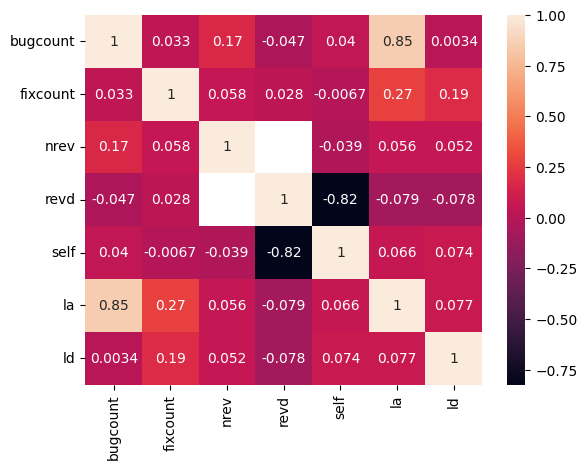

In [ ]:
# DATA ANALYSIS STEP:
# Select columns for analysis
columns = ['bugcount', 'fixcount', 'nrev', 'revd', 'self', 'la', 'ld']

# Look only at rows where bugcount is not NaN
bugcount_notnull_df = conc_df[conc_df['bugcount'].notnull()]

# Look at the correlations for selected columns
filt_cols_df = bugcount_notnull_df.loc[:, columns] # NOTE: We here use 'bugcount_notnull_df'!
print_sample(filt_cols_df, 100)

# Correlation matrix for selected columns
filt_corr_mtx = filt_cols_df.corr()

sb.heatmap(filt_corr_mtx, annot=True)
plot.show()

In [ ]:
columns = ['bugcount', 'isbuggy']

# IMPROVED CLEANUP STEP:

# Set isbuggy to True (1) for all rows where bugcount > 0.0, but keep all other values from bugcount (like NaN and 0.0)
conc_df['isbuggy'] = np.where(conc_df['bugcount'] > 0, 1, pd.to_numeric(conc_df['bugcount'], downcast='integer'))

# temp_filt_cols_df = conc_df.loc[:, columns]
# print_sample(temp_filt_cols_df, 100) # OK!

# IMPUTATION STEP: Add column isbuggy = 1 (True) for all rows where nrev < 2 AND bugcount is NaN
# Only update rows where bugcount is NaN, do not overwrite isbuggy rows that already have either a 0 or a 1
conc_df['isbuggy'] = np.where((conc_df.bugcount.isnull()) & (conc_df['nrev'] > 1), 0, pd.to_numeric(conc_df['isbuggy'], downcast='integer'))

# print('TYPE OF conc_df[isbuggy]:')
# print(type(conc_df['isbuggy'])) # NOTE: the type of this is pandas.core.series.Series

columns = ['bugcount', 'nrev', 'isbuggy']
test_filt_cols_df = conc_df.loc[:, columns]
# print_sample(test_filt_cols_df, 100) # OK!

# print_sample(conc_df['isbuggy'], 100)

# Now we can drop column 'bugcount' completely! As well as 'commit_id' and 'author_date' since they are irrelevant (unique values).
# Column 'fixcount' has a large amount of NaN, so I think I want to drop it as well...
clean_df = conc_df.drop(columns=['commit_id', 'author_date', 'bugcount', 'fixcount'])

print('------- clean_df:')
print(clean_df.shape)
print(clean_df.size)

# Count how many isbuggy rows we have (should have a total of 59010 rows)
print('------------- Number of rows with isbuggy == 1:')
print(clean_df[clean_df.isbuggy == 1].shape[0]) # 4233

print('------------- Number of rows with isbuggy == 0:')
print(clean_df[clean_df.isbuggy == 0].shape[0]) # 23132

print('------------- Number of rows with isbuggy == NaN:')
print(clean_df[clean_df.isbuggy.isnull()].shape[0]) # 31645

print('------------- Missing Values (clean_df):')
print(clean_df.isnull().sum())

# Test element-wise for NaN and return result as a boolean array
isNaN_array = np.isnan(clean_df.isbuggy)
# print_sample(isNaN_array, 100)


------- clean_df:
(59010, 29)
1711290
------------- Number of rows with isbuggy == 1:
4233
------------- Number of rows with isbuggy == 0:
23132
------------- Number of rows with isbuggy == NaN:
31645
------------- Missing Values (clean_df):
la             0
ld             0
nf             0
nd             0
ns             0
ent            0
revd           0
nrev       15192
rtime      15192
tcmt       15192
hcmt       16205
self           0
ndev       15277
age        15277
nuc        15277
app        15277
aexp       15277
rexp       15277
oexp       15277
arexp      15277
rrexp      15277
orexp      15277
asexp      15277
rsexp      15277
osexp      15277
asawr      15277
rsawr      15277
osawr      15277
isbuggy    31645
dtype: int64


In [ ]:
# UPD1: Extend data with additional column/feature called 'code_churn':
clean_df['code_churn'] = (clean_df['la'] + clean_df['ld'])
print_sample(clean_df['code_churn'], 100)
max_code_churn_value = clean_df['code_churn'].max()
print("max_code_churn_value:")
print(max_code_churn_value)  # This value is extremely high!!! Can this really be true?

--------------------------
25813      18
14468       4
8010        2
27485       4
3173        3
23703       6
11667      62
12561       2
16054       1
17312      81
9495       18
26352      75
26193       4
15010       0
13043      16
18301       4
7436       35
26036      29
22575       3
8033       12
25530      72
6820        6
16545       2
9028      842
10250       6
21016       2
2587        4
12247      10
11925      44
21682       5
16386       7
706         3
7840       15
3706        4
22100       6
6237       16
14017       0
13906     100
5632        2
9755      103
20458       3
17143       7
13729       3
30133      10
1101       14
19262       4
31731      20
8524        4
30411       1
13356       2
32011       2
5687       90
24428      15
3363        2
9285       38
17185      35
13095    1374
3498     1480
22669      55
14403       0
376       109
31425      17
17945      83
20723       9
3002      119
30808       2
12643     167
10775      55
8880        1
6357   

In [ ]:
# Encode categorical boolean data in 'revd' and 'self' to numerical (int)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

clean_enc_df = clean_df.copy()

# First we take the 'revd' column:

# clean_enc_df['revd'] = label_encoder.fit_transform(clean_df['revd'])
# clean_enc_df.loc[:, ('revd')] = label_encoder.fit_transform(clean_df['revd'])

# Add the new column using loc
clean_enc_df.loc[:, 'revd'] = label_encoder.fit_transform(clean_df['revd'])

# Verified that this encoding really is ok:
'''
clean_enc_df.loc[:, "revd_num"] = label_encoder.fit_transform(clean_df['revd'])
columns = ['revd', 'revd_num']
verify_filt_bool_cols_df = clean_enc_df.loc[:, columns]
print_sample(verify_filt_bool_cols_df, 100) # OK!
'''

# Then we take the 'self' column:
clean_enc_df.loc[:, 'self'] = label_encoder.fit_transform(clean_df['self'])

print_sample(clean_enc_df['self'])

--------------------------
4235     0
24260    1
1041     1
8925     1
17445    1
15772    0
20906    1
17980    0
2527     0
8839     0
31654    0
26765    1
19986    1
6874     1
9543     0
5348     0
13926    1
16648    0
19858    1
15864    0
Name: self, dtype: int64


--------------------------
       isbuggy  nrev  revd  self  code_churn       la   ld
9188       NaN   NaN     0     1          10        5    5
27245      NaN   1.0     1     0           4        1    3
3489       NaN   1.0     1     0          65       40   25
18940      NaN   1.0     1     0          21       12    9
22597      0.0   2.0     1     0          21        8   13
25931      NaN   NaN     0     1          14        8    6
11677      NaN   1.0     1     0          48       46    2
9528       NaN   1.0     1     1         567      465  102
4170       0.0   2.0     1     0          13        8    5
7777       NaN   1.0     1     0          12        8    4
19459      0.0   6.0     1     0          32       28    4
23906      NaN   NaN     0     1           4        2    2
7631       NaN   NaN     0     1          45       22   23
23592      0.0   3.0     1     0          85        1   84
25538      NaN   NaN     0     1          16       12    4
26094      NaN   1.0     1   

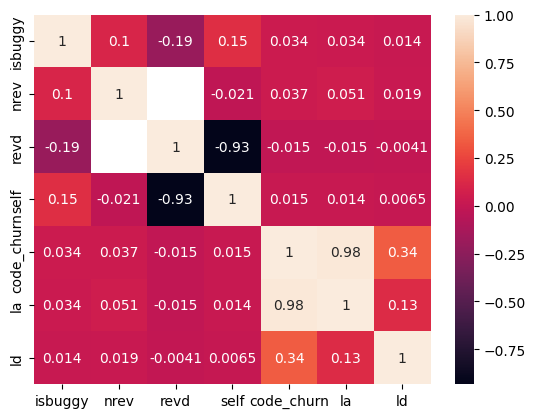

In [ ]:
# DATA ANALYSIS STEP AGAIN: Look at the correlations for selected columns, but now with isbuggy and numerically encoded 0 or 1 values
# UPD1: Also add the extended data in 'code_churn' and 'la', 'ld'
columns = ['isbuggy', 'nrev', 'revd', 'self', 'code_churn', 'la', 'ld']
c_e_filt_cols_df = clean_enc_df.loc[:, columns] # NOTE: Now we operate on 'clean_enc_df' instead!
print_sample(c_e_filt_cols_df, 100)

# Correlation matrix for selected columns
c_e_filt_corr_mtx = c_e_filt_cols_df.corr()

sb.heatmap(c_e_filt_corr_mtx, annot=True)
plot.show()

Here from the correlation matrix it looks like both 'nrev' and 'self' has a small correlation to 'isbuggy'. Also 'revd' has a negative correlation.

As might be expected 'self' and 'revd' has a very high negative correlation.

In [ ]:
# NOTE: We have dropped columns bugcount, commit_id, author_date and fixcount!

# Create correlation matrix

# Split the data frame into three parts by column name (include 'isbuggy' in all parts)
filt_mtx1 = clean_enc_df.filter(['isbuggy','code_churn','la','ld','nf','nd','ns','ent','revd'])

corr_mtx1 = filt_mtx1.corr()

filt_mtx2 = clean_enc_df.filter(['isbuggy','nrev','rtime','tcmt','hcmt','self','ndev','age','nuc','app','aexp','rexp'])

corr_mtx2 = filt_mtx2.corr()

filt_mtx3 = clean_enc_df.filter(['isbuggy','oexp','arexp','rrexp','orexp','asexp','rsexp','osexp','asawr','rsawr','osawr'])

corr_mtx3 = filt_mtx3.corr()

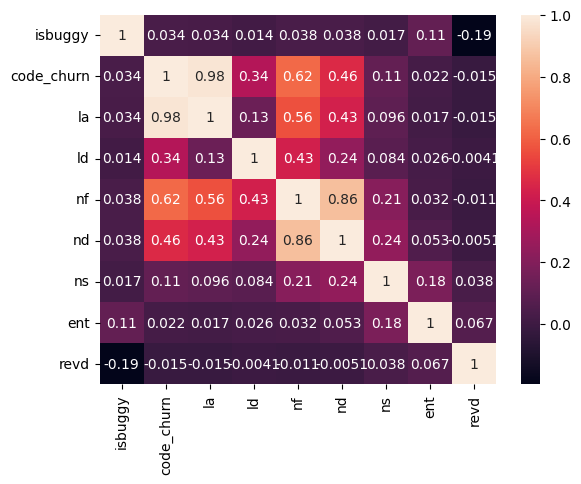

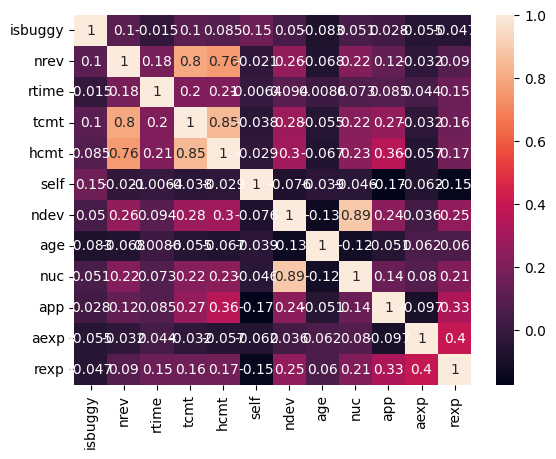

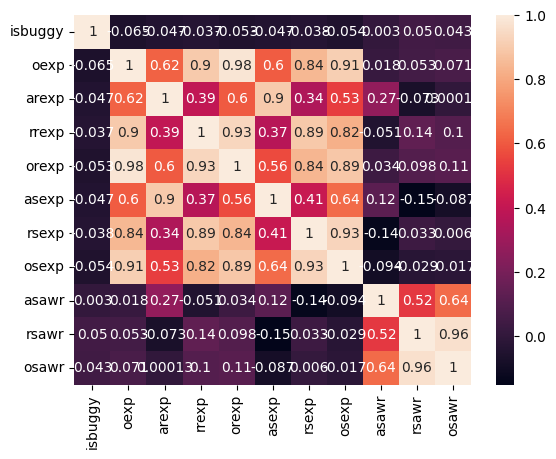

In [ ]:
sb.heatmap(corr_mtx1, annot=True)
plot.show()
sb.heatmap(corr_mtx2, annot=True)
plot.show()
sb.heatmap(corr_mtx3, annot=True)
plot.show()

In [ ]:
# How does clean_enc_df look like now?
# print(clean_enc_df.info())
# print(clean_enc_df.shape)
# print(clean_enc_df.size)


# UPD2: Feature selection (Remove redundant data)
# Drop features that is a member of a feature pair with correlation above 0.88.
clean_enc_df = clean_enc_df.drop(columns=['la', 'nuc', 'osexp', 'orexp', 'arexp', 'osawr'])


# We have isbuggy with 27365 non-null rows
# Let's try to train using this dataframe!

# Drop all rows where we still have NaN values
prep_df = clean_enc_df.dropna()

print(prep_df.info())
print(prep_df.shape)
print(prep_df.size)

# FIXME: or see
# Convert column isbuggy to integer
# prep_df['isbuggy'] = prep_df['isbuggy'].astype(int)

# Save prepared dataframe to file
# file_path = 'C:\Users\A551269\AI_2024\Kau_2024'
result = prep_df.to_csv('./PrepDataframe24features.csv', index=False, header=True)
print(result)

<class 'pandas.core.frame.DataFrame'>
Index: 26383 entries, 1 to 32152
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ld          26383 non-null  int64  
 1   nf          26383 non-null  int64  
 2   nd          26383 non-null  int64  
 3   ns          26383 non-null  int64  
 4   ent         26383 non-null  float64
 5   revd        26383 non-null  int64  
 6   nrev        26383 non-null  float64
 7   rtime       26383 non-null  float64
 8   tcmt        26383 non-null  float64
 9   hcmt        26383 non-null  float64
 10  self        26383 non-null  int64  
 11  ndev        26383 non-null  float64
 12  age         26383 non-null  float64
 13  app         26383 non-null  float64
 14  aexp        26383 non-null  float64
 15  rexp        26383 non-null  float64
 16  oexp        26383 non-null  float64
 17  rrexp       26383 non-null  float64
 18  asexp       26383 non-null  float64
 19  rsexp       26383 non-null  fl